In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tr_x = '/content/drive/My Drive/NNFL/training_feature_matrix - Sheet1.csv'
tr_y = '/content/drive/My Drive/NNFL/training_output - Sheet1.csv'
ts_x = '/content/drive/My Drive/NNFL/test_feature_matrix - Sheet1.csv'
ts_y = '/content/drive/My Drive/NNFL/test_output - Sheet1.csv'

In [ ]:
xtr = pd.read_csv(tr_x, header = None)
ytr = pd.read_csv(tr_y, header = None)

xts = pd.read_csv(ts_x, header = None)
yts = pd.read_csv(ts_y, header = None)

In [ ]:
def normalize(x1, x2):
  x = np.concatenate([x1, x2], axis=0)
  xmean = np.mean(x)
  xstd = np.std(x)
  ret = (x - xmean) / (xstd)
  return ret

In [ ]:
X = normalize(xtr, xts)
Y = normalize(ytr, yts)

In [ ]:
m1 = xtr.shape[0]
m2 = xts.shape[0]
ones_train = np.ones((m1, 1), dtype='float32')
ones_test = np.ones((m2, 1), dtype='float32')
x_train_data = np.concatenate([ones_train, X[:m1, :]], axis=1)
x_test_data = np.concatenate([ones_test, X[m1:m1+m2, :]], axis=1)
y_train_data = Y[:m1, :]
y_test_data = Y[m1:m1+m2, :]

In [ ]:
def eval_loss_and_grad(w, x, y, index):
  m = x.shape[1]

  val = 0
  for i in range(m):
    val = val + x[index][i]*w[i]
  
  lossval = (val - y[index])**2

  # val == h(x)
  gradval = []
  for i in range(m):
    gradval.append((val - y[index])*x[index][i])

  gradval = np.array(gradval)
  return lossval, gradval

In [ ]:
# define hyperparameters
iterations = 1000
alpha = 0.1
w = np.zeros((3, 1), dtype='float32')
# w = np.random.rand(3, 1)
losses = []
w1 = []
w2 = []

In [ ]:
for it in range(iterations):
  ls = 0
  for i in range(m1):
    loss, grad = eval_loss_and_grad(w, x_train_data, y_train_data, i)
    w = w - (1/m1)*alpha*grad
    ls += loss

  w1.append(w[1])
  w2.append(w[2])
  losses.append(ls/m1)

  # print(m1)

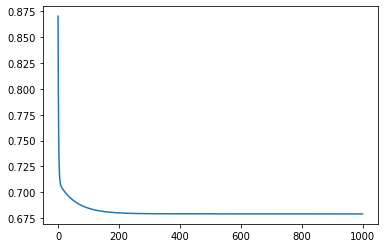

In [ ]:
plt.plot([i for i in range(iterations)], [los.flatten() for los in losses])

In [ ]:
losses[-1]

array([0.67912509])

In [ ]:
y_pred = np.dot(x_test_data, w)

In [ ]:
n, m = y_pred.shape
mse_error = 0

for i in range(n):
  mse_error = mse_error + (y_pred[i] - y_test_data[i])**2

mse_error = (1.0/n)*(mse_error**(0.5))

In [ ]:
print("Mean Squared error = " + str(mse_error[0]))

Mean Squared error = 0.1325895783227794


In [ ]:
w_1 = [f[0] for f in w1]
w_2 = [f[0] for f in w2]
losses_1 = [l[0] for l in losses]

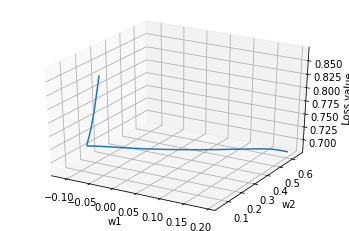

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.set_zlim3d(1.2, 1.7)
# ax.set_ylim3d(-1.5, -0.5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss value')

ax.plot(w_1, w_2, losses_1)
plt.show()